# Introduction
 An aggregate statistic is a way of creating a single number that describes a group of numbers.
 Introduction
 
 Common aggregate statistics include mean, median, and standard deviation.
 
 You will also learn how to rearrange a DataFrame into a pivot table, which is a great way to compare data across two dimensions.
 
 

## Calculating Column Statistics

Aggregate functions summarize many data points (i.e., a column of a dataframe) into a smaller set of values.

The DataFrame customers contains the names and ages of all of your customers. You want to find the median age:

print(customers.age)
>> [23, 25, 31, 35, 35, 46, 62]
print(customers.age.median())
>> 35

The DataFrame shipments contains address information for all shipments that you’ve sent out in the past year. You want to know how many different states you have shipped to (and how many shipments went to the same state).
print(shipments.state)
>> ['CA', 'CA', 'CA', 'CA', 'NY', 'NY', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ']
print(shipments.state.nunique())
>> 3

The DataFrame inventory contains a list of types of t-shirts that your company makes. You want a list of the colors that your shirts come in.
print(inventory.color)
>> ['blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'orange', 'orange', 'orange']
print(inventory.color.unique())
>> ['blue', 'green', 'orange']

The general syntax for these calculations is:

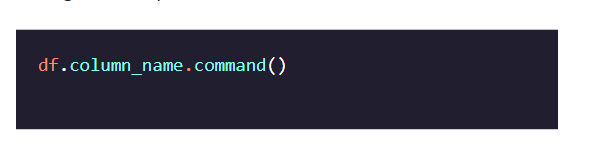

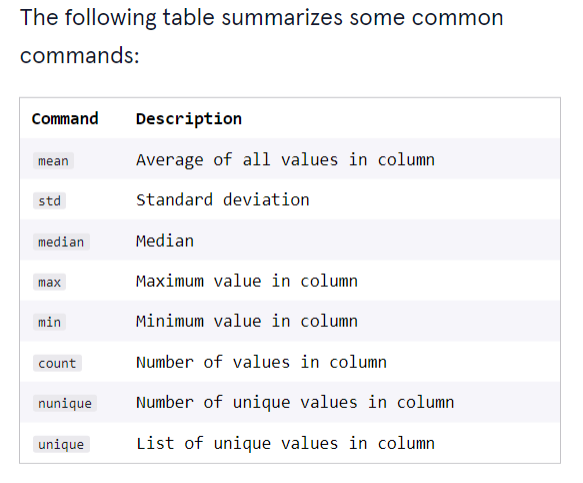


In [1]:
import pandas as pd

orders = pd.read_csv('orders.csv')

most_expensive = orders.price.max()

num_colors = orders.shoe_color.nunique()


FileNotFoundError: [Errno 2] No such file or directory: 'orders.csv'

### Calculating Aggregate Functions I

When we have a bunch of data, we often want to calculate aggregate statistics (mean, standard deviation, median, percentiles, etc.) over certain subsets of the data.

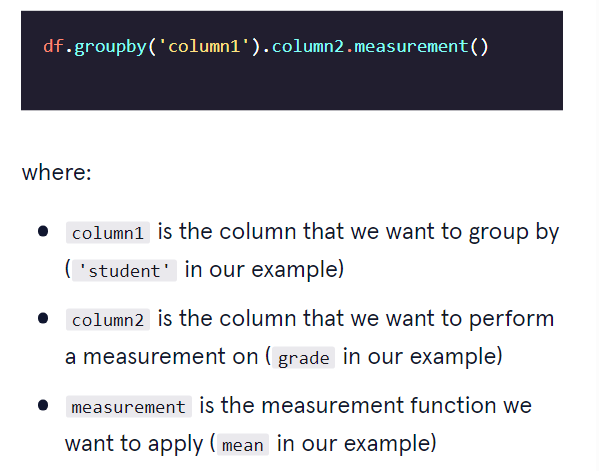



import pandas as pd

orders = pd.read_csv('orders.csv')

pricey_shoes = orders.groupby('shoe_type').price.max()

print(pricey_shoes)

print(type(pricey_shoes))

### Calculating Aggregate Functions II
After using groupby, we often need to clean our resulting data.

As we saw in the previous exercise,<span style="color:red"> the groupby function creates a new Series, not a DataFrame. <span>
    
Usually, we’d prefer that those indices were actually a column. In order to get that, we can use reset_index(). This will transform our Series into a DataFrame and move the indices into their own column.
    
    ![image.png](attachment:image.png)
    
    ![image-2.png](attachment:image-2.png)
    
    

### Calculating Aggregate Functions III
Sometimes, the operation that you want to perform is more complicated than mean or count. In those cases, you can use the apply method and lambda functions

#np.percentile can calculate any percentile over an array of values
high_earners = df.groupby('category').wage
    .apply(lambda x: np.percentile(x, 75))
    .reset_index()
    
import numpy as np
import pandas as pd

orders = pd.read_csv('orders.csv')

cheap_shoes = orders.groupby('shoe_color').price.apply(lambda x: np.percentile(x, 25)).reset_index()
print(cheap_shoes)


    


### Calculating Aggregate Functions IV
Sometimes, we want to group by more than one column. We can easily do this by passing a list of column names into the groupby method.

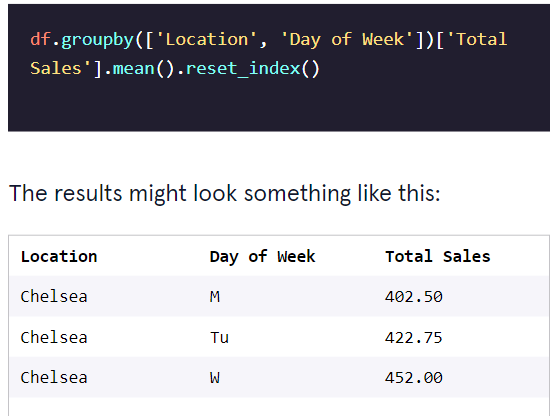

import numpy as np
import pandas as pd

orders = pd.read_csv('orders.csv')

shoe_counts = orders.groupby(['shoe_type','shoe_color']).id.count().reset_index()

print(shoe_counts)



### Pivot Tables
When we perform a groupby across multiple columns, we often want to change how our data is stored. For instance, recall the example where we are running a chain of stores and have data about the number of sales at different locations on different days:

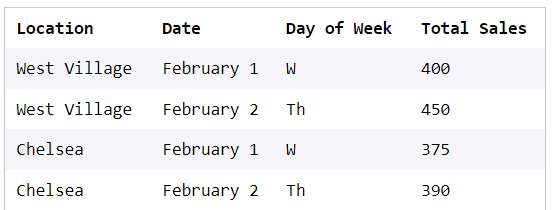
We suspected that there might be different sales on different days of the week at different stores, so we performed a `groupby` across two different columns (`Location` and `Day of Week`). This gave us results that looked like this:

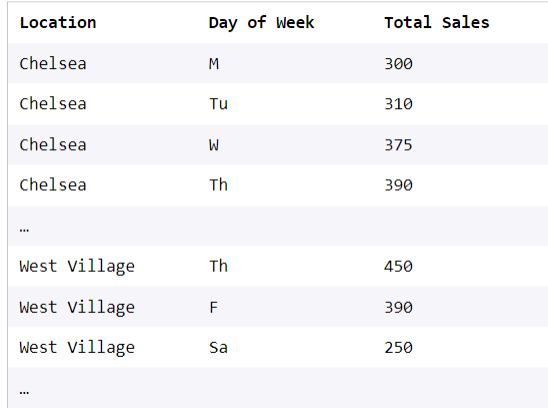

In order to test our hypothesis, it would be more useful if the table was formatted like this:

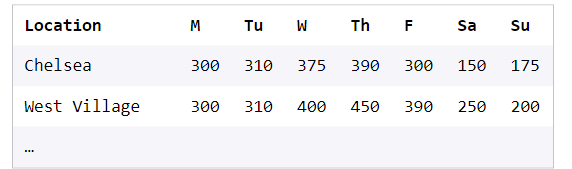

Reorganizing a table in this way is called pivoting. The new table is called a pivot table.

In Pandas, the command for pivot is:
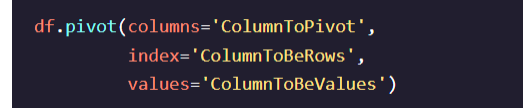


#First use the groupby statement:
unpivoted = df.groupby(['Location', 'Day of Week'])['Total Sales'].mean().reset_index()
#Now pivot the table
pivoted = unpivoted.pivot(
    columns='Day of Week',
    index='Location',
    values='Total Sales')

Just like with groupby, the output of a pivot command is a new DataFrame, but the indexing tends to be “weird”, so we usually follow up with .reset_index().



import numpy as np
import pandas as pd

orders = pd.read_csv('orders.csv')

shoe_counts = orders.groupby(['shoe_type', 'shoe_color']).id.count().reset_index()

print(shoe_counts)

shoe_counts_pivot = shoe_counts.pivot(
  columns='shoe_color',
    index='shoe_type',
    values='id'
).reset_index()

print(shoe_counts_pivot )

import pandas as pd

user_visits = pd.read_csv('page_visits.csv')
print(user_visits.head())

click_source = user_visits.groupby('utm_source').id.count().reset_index()
print(click_source)

click_source_by_month = user_visits.groupby(['utm_source','month']).id.count().reset_index()

click_source_by_month_pivot = click_source_by_month.pivot(
   columns='month',
    index='utm_source',
    values='id'
).reset_index()

print(click_source_by_month_pivot)



# A/B Testing for ShoeFly.com
Our favorite online shoe store, ShoeFly.com is performing an A/B Test. They have two different versions of an ad, which they have placed in emails, as well as in banner ads on Facebook, Twitter, and Google. They want to know how the two ads are performing on each of the different platforms on each day of the week. Help them analyze the data using aggregate measures.




In [3]:
import pandas as pd

ad_clicks = pd.read_csv('ad_clicks.csv')
print(ad_clicks.head())

                                user_id utm_source           day  \
0  008b7c6c-7272-471e-b90e-930d548bd8d7     google  6 - Saturday   
1  009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook    7 - Sunday   
2  00f5d532-ed58-4570-b6d2-768df5f41aed    twitter   2 - Tuesday   
3  011adc64-0f44-4fd9-a0bb-f1506d2ad439     google   2 - Tuesday   
4  012137e6-7ae7-4649-af68-205b4702169c   facebook    7 - Sunday   

  ad_click_timestamp experimental_group  
0               7:18                  A  
1                NaN                  B  
2                NaN                  A  
3                NaN                  B  
4                NaN                  B  


In [4]:
ad_clicks.groupby(['utm_source']).user_id.count().reset_index()


,utm_source,user_id
0,email,255
1,facebook,504
2,google,680
3,twitter,215


In [13]:
is_click = lambda row: False \
           if row.ad_click_timestamp == "NaN"\
           else True
ad_clicks['is_click'] = ad_clicks.apply(is_click, axis = 1)


In [8]:
print(ad_clicks)

                                   user_id utm_source            day  \
0     008b7c6c-7272-471e-b90e-930d548bd8d7     google   6 - Saturday   
1     009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook     7 - Sunday   
2     00f5d532-ed58-4570-b6d2-768df5f41aed    twitter    2 - Tuesday   
3     011adc64-0f44-4fd9-a0bb-f1506d2ad439     google    2 - Tuesday   
4     012137e6-7ae7-4649-af68-205b4702169c   facebook     7 - Sunday   
...                                    ...        ...            ...   
1649  fe8b5236-78f6-4192-9da6-a76bba67cfe6    twitter     7 - Sunday   
1650  fed3db6d-8c92-40e3-a4fb-1fb9d7337eb1   facebook     5 - Friday   
1651  ff3a22ff-521c-478c-87ca-7dc7b8f34372    twitter  3 - Wednesday   
1652  ff3af0d6-b092-4c4d-9f2e-2bdd8f7c0732     google     1 - Monday   
1653  ffdfe7ec-0c74-4623-8d90-d95d80f1ba34   facebook   6 - Saturday   

     ad_click_timestamp experimental_group  is_click  
0                  7:18                  A      True  
1                   NaN  